In [1]:
from scipy.optimize import root, curve_fit, fsolve
from scipy.integrate import odeint
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics #to calculate AUC

In [98]:
#Read file 
matrix_constants = []
vector_ka = []
vector_k2 = []
vector_c = []
allnames = []

names = ['LFAL', 'LFRW', 'HFAL', 'HFRW']
age = ['_6months','_12months', '_18months', '_24months']
for i in range(0,len(names)):
    for j in range (0, len(age)):
        
        print(names[i]+age[j])
        name_group = names[i]+age[j]
        allnames.append(name_group)

        data_ka = pd.read_excel('ka_values.xlsx',name_group) 
        data_k2 = pd.read_excel('k2_values.xlsx',name_group) 
        data_c = pd.read_excel('c_values.xlsx',name_group) 

        matrix_ka = np.array(data_ka)
        datafile_ka = np.delete(matrix_ka, 0,1)
        datafile_ka = datafile_ka.T
        datafile_ka = datafile_ka.astype(None)
        ka = datafile_ka[:,0].tolist()

        matrix_k2 = np.array(data_k2)
        datafile_k2 = np.delete(matrix_k2, 0,1)
        datafile_k2 = datafile_k2.T
        datafile_k2 = datafile_k2.astype(None)
        k2 = datafile_k2[:,0].tolist()

        matrix_c = np.array(data_c)
        datafile_c = np.delete(matrix_c, 0,1)
        datafile_c = datafile_c.T
        datafile_c = datafile_c.astype(None)
        c = datafile_c[:,0].tolist()
        
        vector_ka = vector_ka+ka
        vector_k2 = vector_k2+k2
        vector_c = vector_c+c
        
matrix_constants.append(vector_ka) #1st column, index 0
matrix_constants.append(vector_k2) #2nd column, index 1
matrix_constants.append(vector_c) #3nd column, index 2

#Ctrl + / comments a full region of the code
#datafile (lab or unl) is a matrix containing all mice in the Y_LFD group and all time points
#Each row is a different mouse, and each column a timepoint
#datafile[[0]][[0]] gives first row, [[1]][[0]] second row and so on

# datafile_ins[0] access first line of matrix
# datafile_ins[:,0] access first column of matrix



LFAL_6months
LFAL_12months
LFAL_18months
LFAL_24months
LFRW_6months
LFRW_12months
LFRW_18months
LFRW_24months
HFAL_6months
HFAL_12months
HFAL_18months
HFAL_24months
HFRW_6months
HFRW_12months
HFRW_18months
HFRW_24months


In [84]:
df1 = pd.DataFrame(AllEGPdata, index=allnames)

name_export = 'SteadystateEGP.xlsx' 

with pd.ExcelWriter(name_export) as writer:
    df1.to_excel(writer, sheet_name='EGP_SS')


In [133]:
c = matrix_constants[:][2]
ka= matrix_constants[:][0]
k2 = matrix_constants[:][1]


(0.0, 70.0)

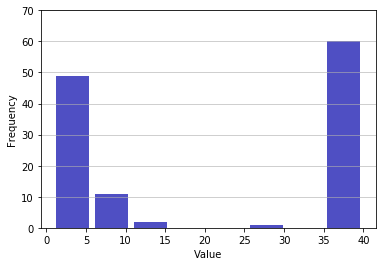

In [137]:
n, bins, patches = plt.hist(x=c, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)




(0.0, 50.0)

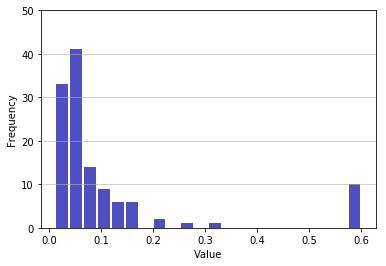

In [135]:
n, bins, patches = plt.hist(x=ka, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


(0.0, 30.0)

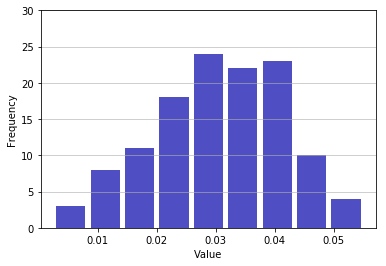

In [136]:
n, bins, patches = plt.hist(x=k2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

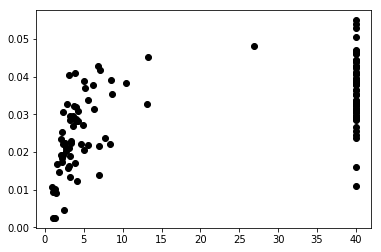

In [138]:
x = c
y = k2

plt.plot(x, y, 'o', color='black');

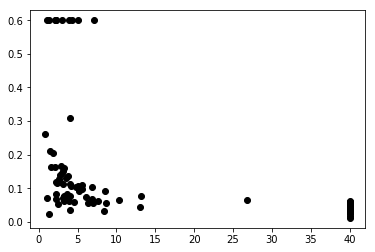

In [139]:
x = c
y = ka

plt.plot(x, y, 'o', color='black');

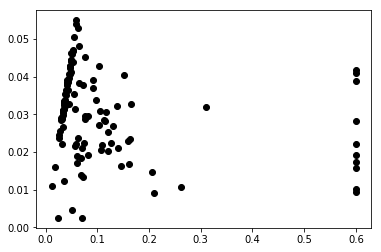

In [140]:
x = ka
y = k2

plt.plot(x, y, 'o', color='black');

(array([ 2.,  1.,  2.,  0.,  2., 11.,  4.,  7.,  7., 13., 13.,  9., 16.,
        15., 11., 26., 29., 27., 30., 43., 47., 49., 42., 56., 41., 37.,
        49., 45., 44., 43., 36., 35., 33., 32., 32., 18., 20., 14., 17.,
         9.,  6.,  8.,  5.,  5.,  4.,  2.,  0.,  0.,  2.,  1.]),
 array([-1.04854663, -1.01377008, -0.97899354, -0.944217  , -0.90944045,
        -0.87466391, -0.83988737, -0.80511083, -0.77033428, -0.73555774,
        -0.7007812 , -0.66600465, -0.63122811, -0.59645157, -0.56167502,
        -0.52689848, -0.49212194, -0.45734539, -0.42256885, -0.38779231,
        -0.35301576, -0.31823922, -0.28346268, -0.24868613, -0.21390959,
        -0.17913305, -0.14435651, -0.10957996, -0.07480342, -0.04002688,
        -0.00525033,  0.02952621,  0.06430275,  0.0990793 ,  0.13385584,
         0.16863238,  0.20340893,  0.23818547,  0.27296201,  0.30773856,
         0.3425151 ,  0.37729164,  0.41206819,  0.44684473,  0.48162127,
         0.51639781,  0.55117436,  0.5859509 ,  0.62072744,

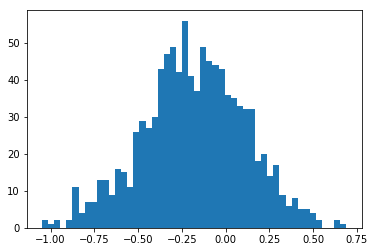

In [157]:
import random, pylab

samplesize = 8
mean = 0.2
std = 1
s = np.random.normal(mean, std, samplesize)

p = []; n =1000
means = np.zeros(shape = n)
for k in range (n):
    l = np.zeros(shape = samplesize)
    for i in range (samplesize):
        r = random.randint(0,samplesize-1)
        l[i]=s[r]
    p.append(l)
    means[k]=np.mean(l)
pylab.hist(means,50)

In [27]:
#Fitting of random curves (averages from Fiona's dataset)

def One_Elimination(x, C1, ka, ke):
    return C1*(-np.exp(-ka*x) + np.exp(-ke*x))

results_lab = []

n=1000

print(n)

for i in range(0,n):
    t0 = 0
    t15 = np.random.normal(1.43, 0.44)
    t30 = np.random.normal(1.54, 0.40)
    t45 = np.random.normal(1.25, 0.36)
    t60 = np.random.normal(0.86, 0.25)
    t75 = np.random.normal(0.65, 0.21)
    t90 = np.random.normal(0.45, 0.15)
    t105 = np.random.normal(0.34, 0.13)
    t120 = np.random.normal(0.27, 0.14)

    x_values = np.array([0,15,30,45,60,75,90,105,120])
    y_values = np.array([t0, t15,t30,t45,t60,t75,t90,t105,t120])
    t2 = np.linspace(0, 120, 1201)

    print(x_values)
    print(y_values)

    #Initial guess for parameters
    C1_=0.4
    ka_=0.1
    ke_=0.03
    
    # For eaverage:
    # popt,cov = curve_fit(One_Elimination, x_values, y_values)
    # For all groups
    popt,cov = curve_fit(One_Elimination, x_values, y_values, p0=[C1_, ka_, ke_],  maxfev=1000000)
    

    
    export=popt.tolist()
    results_lab.append(export)
    constants = np.array(results_lab)


1000
[  0  15  30  45  60  75  90 105 120]
[0.         1.3086608  1.9242392  1.70791565 1.04767105 0.62122679
 0.69936807 0.4356085  0.31057817]
[  0  15  30  45  60  75  90 105 120]
[0.         1.07828399 1.14131156 1.20165666 0.96354133 0.5519024
 0.56502542 0.48360195 0.33161946]
[  0  15  30  45  60  75  90 105 120]
[0.         2.03163706 1.77180144 1.38058213 0.53335059 0.55813883
 0.54773579 0.63281716 0.27148688]
[  0  15  30  45  60  75  90 105 120]
[0.         0.92709951 1.45211926 1.20931837 1.31128202 0.96428734
 0.45938319 0.22572924 0.14535914]
[  0  15  30  45  60  75  90 105 120]
[0.         1.59497682 1.9250321  1.55088831 0.89015514 0.66007976
 0.57465499 0.2768308  0.27240952]
[  0  15  30  45  60  75  90 105 120]
[0.         0.88841998 1.36749243 0.87347576 0.93780607 0.64746215
 0.35892969 0.19685482 0.27002693]
[  0  15  30  45  60  75  90 105 120]
[0.         1.18998662 1.98871246 0.71564515 0.55569469 0.59279683
 0.32904421 0.58761936 0.27048465]
[  0  15  30  45

[  0  15  30  45  60  75  90 105 120]
[0.         1.04604584 1.73359783 0.69911696 0.91257406 0.58196134
 0.64486593 0.1089264  0.38334916]
[  0  15  30  45  60  75  90 105 120]
[0.         0.86589561 1.84968108 1.49140313 1.06002716 0.60423806
 0.185915   0.20505537 0.16284351]
[  0  15  30  45  60  75  90 105 120]
[0.         0.81392068 1.49419235 1.41943574 0.64551079 0.5751823
 0.51657382 0.3094274  0.28439988]
[  0  15  30  45  60  75  90 105 120]
[0.         1.77631224 1.45722009 1.33949294 1.13602112 0.39052526
 0.40283573 0.21696652 0.30328941]
[  0  15  30  45  60  75  90 105 120]
[0.         0.36751463 1.84434465 1.67672589 1.14412858 0.53992896
 0.40322295 0.17088583 0.47310421]
[  0  15  30  45  60  75  90 105 120]
[0.         1.76619445 2.02088076 1.50288089 0.42600606 0.96646936
 0.59817085 0.37219465 0.04064066]
[  0  15  30  45  60  75  90 105 120]
[0.         0.76180883 1.93054921 1.40336307 0.26788893 0.35494994
 0.46194288 0.462092   0.57685336]
[  0  15  30  45  60 

[  0  15  30  45  60  75  90 105 120]
[0.         1.01458104 2.27515792 1.53521554 0.51826439 0.76763467
 0.71423375 0.32489381 0.35812861]
[  0  15  30  45  60  75  90 105 120]
[0.         0.93304753 0.95648918 1.72348078 0.91273886 0.54700993
 0.47091642 0.3031441  0.2225108 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.49098823 1.76301633 1.85159617 0.77372816 0.47090014
 0.5552741  0.36419635 0.54700665]
[  0  15  30  45  60  75  90 105 120]
[0.         1.29369992 2.07910635 1.11800337 0.72943684 0.55459152
 0.08249336 0.59936378 0.2297455 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.38615928 2.28579556 1.23898383 1.11297326 0.46912377
 0.49048638 0.19251942 0.32427037]
[  0  15  30  45  60  75  90 105 120]
[0.         1.65143268 1.57973429 1.37948339 0.85554084 0.83906261
 0.76750004 0.34638776 0.23008337]
[  0  15  30  45  60  75  90 105 120]
[0.         0.81019973 1.54797948 1.65250295 0.80515944 0.55991527
 0.54309741 0.2075857  0.41431508]
[  0  15  30  45  60

 0.19639125 0.37052674 0.59992192]
[  0  15  30  45  60  75  90 105 120]
[0.         1.65842709 2.05353653 1.49209071 0.69866344 0.57120844
 0.49794195 0.40974311 0.24515381]
[  0  15  30  45  60  75  90 105 120]
[0.         1.430938   1.72382626 1.31465666 1.03737803 0.68129178
 0.64614862 0.0441871  0.44229795]
[  0  15  30  45  60  75  90 105 120]
[0.         0.99596378 2.23583979 1.57142676 1.36198039 0.80497834
 0.4588886  0.4477711  0.12581775]
[  0  15  30  45  60  75  90 105 120]
[0.         1.7544114  1.01022132 1.77662819 1.19490956 0.52221416
 0.44891987 0.41797969 0.13395427]
[  0  15  30  45  60  75  90 105 120]
[0.         1.80868232 0.8273333  1.29344724 0.61403638 0.558361
 0.50298637 0.3280555  0.29171414]
[  0  15  30  45  60  75  90 105 120]
[0.         1.87728441 1.32150362 0.65467341 0.76464985 0.77956406
 0.33758876 0.54696935 0.19425583]
[  0  15  30  45  60  75  90 105 120]
[0.         1.72178323 1.45239561 0.85492551 0.8489942  0.84967061
 0.5601195  0.52373318

[  0  15  30  45  60  75  90 105 120]
[0.         0.98441387 2.00128129 1.03889215 0.8547146  0.61300152
 0.27544568 0.18165589 0.18206381]
[  0  15  30  45  60  75  90 105 120]
[0.         0.95755503 2.30665073 0.98516457 1.02811661 0.48413962
 0.66780498 0.42112285 0.20922113]
[  0  15  30  45  60  75  90 105 120]
[0.         1.5556763  1.73397854 1.14076764 0.97001778 0.82421431
 0.35093181 0.28246119 0.30934782]
[  0  15  30  45  60  75  90 105 120]
[0.         1.68633534 1.83000651 1.96420085 0.76244798 0.74676464
 0.44553546 0.22529298 0.11550748]
[  0  15  30  45  60  75  90 105 120]
[0.         1.54051196 1.30090566 2.03120116 0.80047266 0.67966318
 0.4224417  0.21246687 0.3490354 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.46033108 1.59242793 1.00962204 1.14682715 1.06390193
 0.65592084 0.61057526 0.21244183]
[  0  15  30  45  60  75  90 105 120]
[0.         1.43320104 0.99682825 0.98947501 1.17644193 0.73359362
 0.18405317 0.32120676 0.16202627]
[  0  15  30  45  60

[  0  15  30  45  60  75  90 105 120]
[0.         1.16647216 1.23487734 1.43109229 1.41806839 0.38982836
 0.36298194 0.16828515 0.24596874]
[  0  15  30  45  60  75  90 105 120]
[0.         1.25789994 1.43696899 1.54122746 0.68032353 0.66395662
 0.27923845 0.41099477 0.18536655]
[  0  15  30  45  60  75  90 105 120]
[0.         1.30721301 1.25220696 1.23529171 0.8229237  0.48567995
 0.37003563 0.39198672 0.27836087]
[  0  15  30  45  60  75  90 105 120]
[0.         1.44660204 1.64764702 0.58189475 0.88879531 0.36612098
 0.31772504 0.5398848  0.30393246]
[  0  15  30  45  60  75  90 105 120]
[0.         1.11223268 1.33546912 1.7874554  0.67068907 0.91823559
 0.59122846 0.40428941 0.28198697]
[  0  15  30  45  60  75  90 105 120]
[0.         1.10763149 1.64430422 1.42578069 1.11206799 0.24592824
 0.54082563 0.39757445 0.25172385]
[  0  15  30  45  60  75  90 105 120]
[0.         1.60602334 1.63811313 1.8343177  1.08517415 0.46288105
 0.61206065 0.37786303 0.33877808]
[  0  15  30  45  60

[  0  15  30  45  60  75  90 105 120]
[0.         1.42472555 1.32663326 1.85838652 0.49610273 0.46385053
 0.23967453 0.1981077  0.5192725 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.67910141 1.99698641 1.11510705 0.93563093 0.79853657
 0.6005459  0.08964143 0.09062834]
[  0  15  30  45  60  75  90 105 120]
[0.         1.73324044 1.38989733 1.39813406 0.84438435 1.02369879
 0.56880318 0.28586584 0.35305751]
[  0  15  30  45  60  75  90 105 120]
[0.         0.8895445  1.35223941 1.63893584 0.86804158 0.61104488
 0.2936315  0.32715548 0.16086609]
[  0  15  30  45  60  75  90 105 120]
[ 0.          1.11294007  1.09666967  1.29001982  0.61436237  0.87440608
  0.64265083  0.36662892 -0.07663541]
[  0  15  30  45  60  75  90 105 120]
[0.         1.42081714 1.38736257 1.34021068 0.61699177 0.69232025
 0.24967677 0.4254064  0.34177005]
[  0  15  30  45  60  75  90 105 120]
[0.         1.61212084 1.2213347  1.40398722 1.12887363 0.59409646
 0.62969432 0.33152622 0.06747233]
[  0  15  3

[  0  15  30  45  60  75  90 105 120]
[0.         1.00350348 1.99070368 1.49757625 0.61166987 0.22858026
 0.37528784 0.35122414 0.13187688]
[  0  15  30  45  60  75  90 105 120]
[0.         1.57182906 1.86853221 1.12309    0.70679756 0.49399108
 0.5802903  0.18852926 0.4360843 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.07985066 1.00202759 1.05763093 0.63913588 0.95166119
 0.62602263 0.23439654 0.23092927]
[  0  15  30  45  60  75  90 105 120]
[0.         0.76297515 1.17492171 1.24979409 0.94905938 0.5834544
 0.35968648 0.51452671 0.67249091]
[  0  15  30  45  60  75  90 105 120]
[0.         1.85956113 2.2210331  0.71062825 0.68086109 1.02585487
 0.35465614 0.37604494 0.3106673 ]
[  0  15  30  45  60  75  90 105 120]
[0.         0.94997837 1.62458646 1.56441479 1.01878786 0.42872628
 0.48269984 0.12474275 0.25202103]
[  0  15  30  45  60  75  90 105 120]
[0.         1.31697911 1.81531048 1.16215282 1.32129928 0.45041544
 0.39529444 0.32683755 0.30383639]
[  0  15  30  45  60 

[  0  15  30  45  60  75  90 105 120]
[0.         2.12115308 1.45974347 0.96707504 0.90812961 0.32803954
 0.39516662 0.31413566 0.27436302]
[  0  15  30  45  60  75  90 105 120]
[0.         1.39129258 0.55295295 1.08900244 1.02591364 0.81978556
 0.57320287 0.1831649  0.39358921]
[  0  15  30  45  60  75  90 105 120]
[0.         1.34304379 1.23196604 1.33152055 0.82053848 0.56664879
 0.45649841 0.33859677 0.36055511]
[  0  15  30  45  60  75  90 105 120]
[0.         1.73935352 1.49125689 1.01267744 0.76459931 0.81435823
 0.45080985 0.41975323 0.12509146]
[  0  15  30  45  60  75  90 105 120]
[0.         1.89647519 1.47486726 1.45912961 0.94738431 0.58209526
 0.4034302  0.2325848  0.1245432 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.74117891 1.6734025  1.10970825 1.1355957  0.72308778
 0.54357718 0.5584955  0.46922356]
[  0  15  30  45  60  75  90 105 120]
[0.         1.14038722 1.31856489 1.10542527 0.61508067 0.57092077
 0.22218909 0.19442462 0.42003452]
[  0  15  30  45  60

[  0  15  30  45  60  75  90 105 120]
[0.         1.40538726 1.51983515 1.26619625 0.99543779 0.47680745
 0.51857371 0.11429353 0.41223718]
[  0  15  30  45  60  75  90 105 120]
[0.         1.31700044 2.18998727 1.95269723 1.0143455  0.98004262
 0.31457034 0.25467994 0.6586758 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.06309498 0.85457071 0.7228081  0.74630771 0.45676873
 0.45248001 0.32550602 0.37008987]
[  0  15  30  45  60  75  90 105 120]
[0.         1.79715126 1.58879173 1.02311708 0.88327717 0.72880568
 0.70219351 0.30794789 0.01626115]
[  0  15  30  45  60  75  90 105 120]
[0.         1.31008987 2.20981089 0.72043998 0.55956357 0.90544445
 0.39663612 0.18875633 0.12611572]
[  0  15  30  45  60  75  90 105 120]
[0.         1.37159849 2.13868329 1.87248199 1.23000428 0.68338061
 0.70080709 0.41518971 0.26736213]
[  0  15  30  45  60  75  90 105 120]
[0.         1.28274874 1.47956117 1.06951948 1.28860138 0.74374739
 0.44094475 0.29606252 0.30563395]
[  0  15  30  45  60

[  0  15  30  45  60  75  90 105 120]
[0.         0.99099229 1.80465002 1.51627164 1.28603247 1.07425436
 0.29238546 0.32011777 0.07686049]
[  0  15  30  45  60  75  90 105 120]
[0.         1.63769727 1.74482112 1.65926352 0.66502729 0.64901292
 0.33931219 0.3098297  0.17269335]
[  0  15  30  45  60  75  90 105 120]
[0.         2.19711597 2.03079315 1.75341398 1.18789862 0.69537293
 0.57018185 0.37424968 0.0518409 ]
[  0  15  30  45  60  75  90 105 120]
[0.         2.02108006 1.85988503 0.85019711 0.65892233 0.49768383
 0.76657054 0.54159783 0.19849316]
[  0  15  30  45  60  75  90 105 120]
[0.         0.87539166 0.8855601  1.63467485 0.79537431 0.80500718
 0.49344223 0.37514532 0.25279558]
[  0  15  30  45  60  75  90 105 120]
[0.         1.31383145 1.2495248  1.58240345 0.48554031 0.54436438
 0.38272727 0.28243176 0.27803431]
[  0  15  30  45  60  75  90 105 120]
[0.         0.5671096  1.67835904 0.71452802 0.82613168 0.56885743
 0.35959581 0.23861701 0.30536569]
[  0  15  30  45  60

[  0  15  30  45  60  75  90 105 120]
[0.         1.22384414 1.68976638 1.64720602 0.80450965 0.79228732
 0.46039017 0.18891979 0.2991955 ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.16002929 1.445533   1.50422532 0.77780728 0.4396525
 0.26088611 0.2731706  0.24691424]
[  0  15  30  45  60  75  90 105 120]
[0.         1.1498534  1.41028513 1.34851899 1.10223837 0.48162024
 0.36198674 0.22325451 0.39921655]
[  0  15  30  45  60  75  90 105 120]
[0.         1.46131076 2.17163891 0.32462675 1.11427136 0.48095798
 0.92471365 0.24503173 0.12104535]
[  0  15  30  45  60  75  90 105 120]
[0.         1.70538335 2.23092741 1.51661748 1.24598806 0.74655537
 0.24040327 0.42565464 0.12068303]
[  0  15  30  45  60  75  90 105 120]
[0.         1.9788535  1.23768075 1.39222818 0.98239785 0.34461672
 0.38427991 0.3076947  0.45360273]
[  0  15  30  45  60  75  90 105 120]
[0.         1.79425336 1.55764049 1.00623755 1.38531235 0.64572259
 0.72699755 0.41159826 0.40880858]
[  0  15  30  45  60 

[  0  15  30  45  60  75  90 105 120]
[0.         1.34849575 1.85703194 0.23704686 0.20694413 0.62234572
 0.60843429 0.48216838 0.26417457]
[  0  15  30  45  60  75  90 105 120]
[0.         1.35542334 1.07177337 1.29545305 0.87544776 0.8956565
 0.73995468 0.22337017 0.11873677]
[  0  15  30  45  60  75  90 105 120]
[0.         1.09693766 1.40162914 1.93619441 1.13642158 0.64304664
 0.43117298 0.55097659 0.22856909]
[  0  15  30  45  60  75  90 105 120]
[0.         1.1937075  1.19740789 1.11119364 1.11963216 0.27146723
 0.06445735 0.12913793 0.254149  ]
[  0  15  30  45  60  75  90 105 120]
[0.         1.11742542 1.6306247  1.08978419 0.9951074  0.51445693
 0.67572365 0.33489333 0.18751204]
[  0  15  30  45  60  75  90 105 120]
[0.         1.62094734 1.68041295 0.99637257 0.83780413 0.80203834
 0.22299033 0.43782739 0.55541767]
[  0  15  30  45  60  75  90 105 120]
[0.         1.07599475 2.22983136 1.4780716  0.962859   0.71738835
 0.18482137 0.22908484 0.27858432]
[  0  15  30  45  60 

KeyboardInterrupt: 

In [58]:
#Fitting of random curves (averages from Angela's dataset)

def One_Elimination(x, C1, ka, ke):
    return C1*(-np.exp(-ka*x) + np.exp(-ke*x))

results_lab = []

n=10

print(n)

for i in range(0,n):
    t0 = 0
    t5 = np.random.normal(0.061, 0.04)
    t10 = np.random.normal(0.155, 0.10)
    t20 = np.random.normal(0.268, 0.16)
    t30 = np.random.normal(0.334, 0.18)
    t45 = np.random.normal(0.336, 0.15)
    t60 = np.random.normal(0.291, 0.12)
    t90 = np.random.normal(0.211, 0.08)
    t120 = np.random.normal(0.145, 0.06)

    x_values = np.array([0,5,10,20,30,45,60,90,120])
    y_values = np.array([t0, t5,t10,t20,t30,t45,t60,t90,t120])
    #y_values = np.array([0,0.067,0.161,0.238,0.204,0.158,0.108,0.055,0.029])
    t2 = np.linspace(0, 120, 1201)

    print(x_values)
    print(y_values)

    #Initial guess for parameters
    C1_=38
    ka_=0.042
    ke_=0.042
    
    # For eaverage:
    # popt,cov = curve_fit(One_Elimination, x_values, y_values)
    # For all groups
    popt,cov = curve_fit(One_Elimination, x_values, y_values, p0=[C1_, ka_, ke_],  maxfev=1000000)
    

    
    export=popt.tolist()
    results_lab.append(export)
    constants = np.array(results_lab)



10
[  0   5  10  20  30  45  60  90 120]
[ 0.          0.09448458  0.09740726 -0.01372844  0.28403274  0.04264162
  0.23043923  0.3062777   0.15003791]
[  0   5  10  20  30  45  60  90 120]
[0.         0.07018499 0.25540674 0.28949376 0.20750407 0.41096551
 0.41758983 0.1482677  0.10929221]
[  0   5  10  20  30  45  60  90 120]
[0.         0.00220476 0.24380202 0.26347512 0.52320706 0.11820554
 0.35969272 0.13519998 0.14479399]
[  0   5  10  20  30  45  60  90 120]
[0.         0.06690437 0.11740569 0.31918828 0.11058369 0.21160583
 0.22150938 0.09477684 0.10150816]
[  0   5  10  20  30  45  60  90 120]
[0.         0.10528285 0.09955149 0.16088524 0.50162629 0.65197608
 0.25314418 0.1853937  0.19724806]
[  0   5  10  20  30  45  60  90 120]
[0.         0.0012672  0.11159213 0.1479638  0.40148928 0.05481862
 0.54991097 0.15468719 0.13719839]
[  0   5  10  20  30  45  60  90 120]
[0.         0.11022419 0.10692109 0.15903316 0.49014369 0.47506521
 0.34962165 0.26838853 0.07511759]
[  0   5

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in add
  after removing the cwd from sys.path.


In [59]:
c = constants[:,0]
ka = constants[:,1]
k2 = constants[:,2]


print(c,ka,k2)

[4.26769844e+01 1.59599830e+02 9.77083753e-01 3.83277779e-01
 1.59509272e+02 8.00564019e+01 2.38778982e+02 1.13766778e+00
 9.80962688e+01 2.93098401e+03] [0.01161343 0.02585482 0.04768591 0.0688042  0.02407932 0.02032133
 0.02406628 0.06338308 0.02153685 3.27453348] [0.0114545  0.02570126 0.01811897 0.01215244 0.02391376 0.02012226
 0.02396127 0.01845976 0.02135309 2.09425993]


(0.0, 20.0)

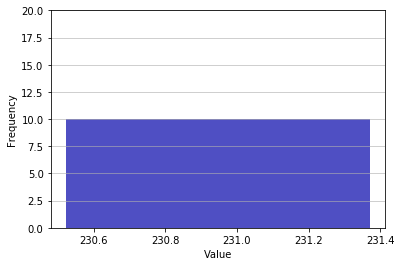

In [38]:
n, bins, patches = plt.hist(x=c, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)




(0.0, 130.0)

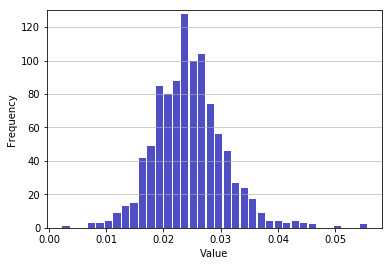

In [31]:
n, bins, patches = plt.hist(x=ka, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


(0.0, 120.0)

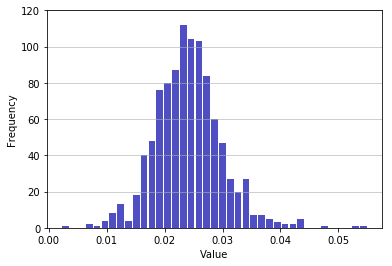

In [32]:
n, bins, patches = plt.hist(x=k2, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

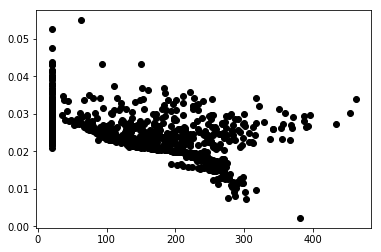

In [33]:


x = c
y = k2

plt.plot(x, y, 'o', color='black');

#fig = plt.figure(figsize=(12, 6))


#ax = fig.add_subplot(121)

#ax.set_title('Full view')
#ax.plot(x, y,'o', color='black')
#ax.set_xlim([0, 100])


#plt.show()

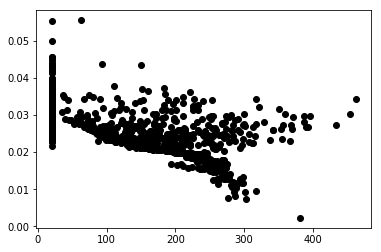

In [34]:
x = c
y = ka

plt.plot(x, y, 'o', color='black');




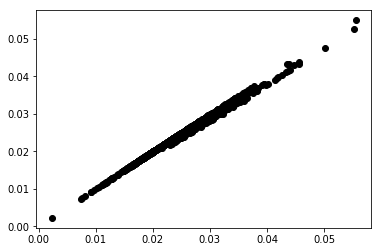

In [35]:
x = ka
y = k2

plt.plot(x, y, 'o', color='black');

(array([543.,  69.,  11.,   5.,   4.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   2.,   1.,   0.,   0.,   3.,   1.,   0.,   1.,
          0.,   1.,   1.,   0.,   1.,   1.,   2.,   1.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,
          0.,   1.,   2.,   2.,   0.,   1.,   0.,   1.,   2.,   2.,   0.,
          1.,   1.,   2.,   0.,   0.,   2.,   0.,   2.,   1.,   4.,   1.,
          2.,   1.,   1.,   0.,   1.,   0.,   2.,   2.,   3.,   1.,   3.,
          0.,   3.,   2.,   1.,   4.,   3.,   0.,   1.,   2.,   3.,   3.,
          0.,   3.,   2.,   2.,   2.,   0.,   3.,   3.,   3.,   1.,   1.,
          1.,   0.,   2.,   5.,   2.,   0.,   0.,   2.,   1.,   1.,   1.,
          2.,   1.,   1.,   1.,   1.,   2.,   1.,   2.,   2.,   0.,   0.,
          2.,   1.,   1.,   2.,   1., 

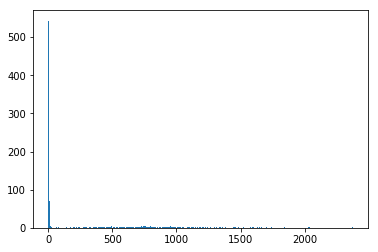

In [264]:
pylab.hist(c,500)

In [329]:
c_new = c.tolist()


In [330]:
c_new

[6.643216417472035,
 1128.2951314269142,
 3.3850445709573633,
 1297.326559676453,
 849.1389797711579,
 4.361696489179883,
 239.26657711568433,
 452.62908269690587,
 591.0977266930676,
 1846.072751854401,
 34.49029149165798,
 1002.0027525614349,
 3.096455695983508,
 1.8138128828091522,
 520.5245161225547,
 4.379266783831341,
 742.5950508623811,
 2.1171309398442366,
 456.89092814058915,
 559.5109028669,
 1130.308888256184,
 1.9517974012969408,
 517.2669732434989,
 530.9111017160932,
 372.363530709148,
 951.0868727414619,
 2.501467287944368,
 4.83274835596335,
 2.593370755092849,
 5.705155862402219,
 750.8787392284066,
 8.812483568582374,
 535.6563414460712,
 3.9675815789699604,
 7.525628071680057,
 1086.21118584738,
 1013.2255446832071,
 7.7551010402850515,
 2.1653304265373743,
 3.8310865259844666,
 3.7762040669008643,
 1.5879893118239305,
 2.4339128729043304,
 3.1189970812758254,
 360.3724825510487,
 1166.4846258112493,
 952.2590355138392,
 2.3897949562784415,
 3.267693539720481,
 740.9

In [331]:
c_newnew=[]

In [332]:
for i in range(len(c_new)):
    if c_new[i] < 30:
        c_newnew.append(c_new[i])

In [333]:
print(c_newnew)

[6.643216417472035, 3.3850445709573633, 4.361696489179883, 3.096455695983508, 1.8138128828091522, 4.379266783831341, 2.1171309398442366, 1.9517974012969408, 2.501467287944368, 4.83274835596335, 2.593370755092849, 5.705155862402219, 8.812483568582374, 3.9675815789699604, 7.525628071680057, 7.7551010402850515, 2.1653304265373743, 3.8310865259844666, 3.7762040669008643, 1.5879893118239305, 2.4339128729043304, 3.1189970812758254, 2.3897949562784415, 3.267693539720481, 5.006996159169727, 4.309224818958749, 3.137616041056215, 6.122439486084832, 1.635480184111892, 2.3339319118441444, 2.2928311214484345, 2.530755680498491, 14.300198706451813, 2.091295987617986, 5.0126276690927005, 2.127804121889427, 5.554130718817557, 2.484418221798209, 3.0869352534821055, 1.4070228057941165, 1.7756332933223447, 6.230962206743868, 3.735248201578748, 8.977372754627243, 2.7605279294081675, 5.37535931486005, 11.063341510603303, 1.8240700020065859, 1.464734891221131, 2.603190146998127, 5.27326775904911, 3.18911672

(0.0, 110.0)

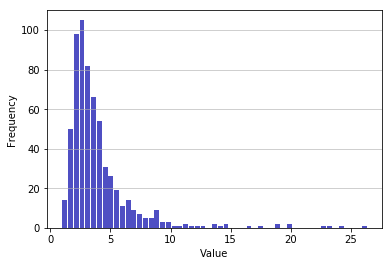

In [334]:
n, bins, patches = plt.hist(x=c_newnew, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)



In [322]:
cnewnew

NameError: name 'cnewnew' is not defined

In [337]:
ka_new = ka.tolist()
ka_newnew=[]
for i in range(len(ka_new)):
    if ka_new[i] < 0.3:
        ka_newnew.append(ka_new[i])

(0.0, 290.0)

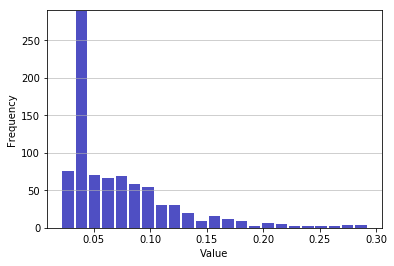

In [338]:
n, bins, patches = plt.hist(x=ka_newnew, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
